# 13.9: Анализ оттока клиентов банка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
pyplt=plotly.offline.plot

In [2]:
churn=pd.read_csv('data/churn.csv')

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.drop('RowNumber', axis=1) #удаляем столбец RowNumbers, для анализа он не нужен

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

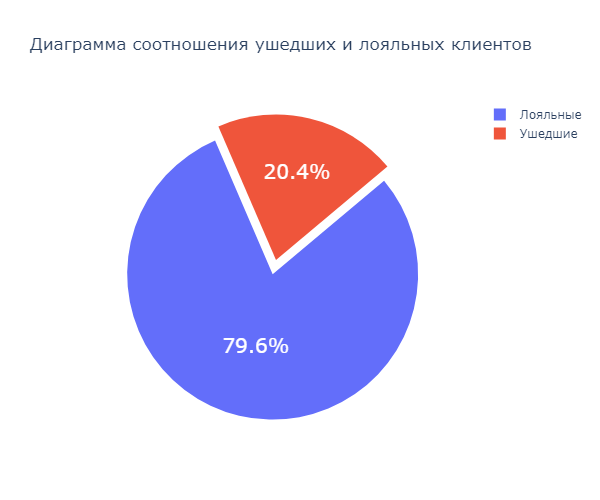

'temp/13.9.1.html'

In [7]:
values=[churn[churn['Exited']==0]['Exited'].count(), churn[churn['Exited']==1]['Exited'].count()]
labels=['Лояльные', 'Ушедшие']
trace=[go.Pie(
    labels=labels,
    values=values,
    rotation=50,
    showlegend=True,
    pull=[0.1,0,0,0,0],
    hoverinfo='label+percent',
    textinfo='percent',
    textfont=dict(size=20,color='white'))]
layout=go.Layout(
    title='Диаграмма соотношения ушедших и лояльных клиентов',
    width=600,
    height=500
)
fig=go.Figure(
    data=trace,
    layout=layout
    )
fig.show('png')
pyplt(fig,filename='temp/13.9.1.html')


Как видно из диаграммы процент ушедших клиентов составляет 20.4%, что говорит о достаточной лояльности клиентов банка.
Большая часть клиентов остается на обслуживании у банка, что является хорошим показателем клиентоориентированости.

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.